# 10 MINUTE DATA

## MODEL 1: ALL FEATURES

In [1]:
%reset -f

In [2]:
# imports

import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [3]:
# read data

march_df = pd.read_csv("BTC_10min_ETH_10min_march.csv")
april_df = pd.read_csv("BTC_10min_ETH_10min_april.csv")

In [4]:
# combine data

df = pd.concat([march_df, april_df], axis=0)

# split testing and training data

train_size = int(np.round(df.shape[0]*0.90))
test_size = int(np.round(df.shape[0]*0.10))

training_set = df.iloc[:train_size, 1:]
test_set = df.iloc[test_size:, 1:]

In [5]:
training_set.head()

,BTC Polarity,BTC Subjectivity,BTC Price,BTC Volume USD,ETH Polarity,ETH Subjectivity,ETH Price,ETH Volume USD,Net Polarity,Net Subjectivity,Net Volume,Price Ratio
0,0.059776,0.247396,45346.19,11649.92686,0.024760,0.299496,1428.53,40722.93557,0.035016,-0.052101,-29073.00871,0.031503
1,0.060227,0.227976,45289.97,313492.75750,0.060539,0.322566,1420.54,0.00000,-0.000311,-0.094590,313492.75750,0.031365
2,0.072547,0.242424,46340.26,590826.20210,0.106064,0.332174,1448.57,49394.48724,-0.033517,-0.089750,541431.71486,0.031259
3,0.082249,0.275825,46473.16,315746.03920,0.036179,0.296867,1449.17,68768.92247,0.046069,-0.021042,246977.11673,0.031183
4,0.101809,0.300476,46555.87,203311.87260,0.022930,0.317710,1445.92,81577.03215,0.078879,-0.017233,121734.84045,0.031058


In [6]:
test_set.head()

,BTC Polarity,BTC Subjectivity,BTC Price,BTC Volume USD,ETH Polarity,ETH Subjectivity,ETH Price,ETH Volume USD,Net Polarity,Net Subjectivity,Net Volume,Price Ratio
850,0.102714,0.299668,48648.93,1266.818137,0.046874,0.365025,1640.00,1.829677e+06,0.055841,-0.065356,-1.828410e+06,0.033711
851,0.090503,0.284943,48592.81,260150.012000,0.066194,0.300029,1640.33,1.141728e+05,0.024308,-0.015086,1.459773e+05,0.033757
852,0.070822,0.243996,48678.81,168693.683200,0.045281,0.355852,1648.08,9.589411e+03,0.025541,-0.111857,1.591043e+05,0.033856
853,0.067182,0.303544,48606.79,21562.122240,0.090686,0.370060,1645.54,6.203615e+04,-0.023504,-0.066516,-4.047403e+04,0.033854
854,0.101192,0.284924,48652.82,784.472231,0.036569,0.353766,1645.79,5.443107e+04,0.064622,-0.068842,-5.364660e+04,0.033827


In [7]:
# feature scaling

x_sc = MinMaxScaler(feature_range = (0, 1))
y_sc = MinMaxScaler(feature_range = (0, 1))

training_set.iloc[:, 0:11] = x_sc.fit_transform(training_set.iloc[:, 0:11])
training_set['Price Ratio'] = y_sc.fit_transform(training_set['Price Ratio'].values.reshape(-1,1))
training_set_scaled = training_set.values

In [8]:
# creating a data structure with 6 time-steps and 1 output
window = 6

X_train = []
y_train = []
for i in range(window, train_size):
    X_train.append(training_set_scaled[i-window:i, 0:11])
    y_train.append(training_set_scaled[i, -1])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 11))

In [9]:
X_train.shape

(7640, 6, 11)

In [10]:
y_train.shape

(7640,)

In [11]:
# model

model_1 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model_1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model_1.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model_1.add(LSTM(units = 50, return_sequences = True))
model_1.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model_1.add(LSTM(units = 50, return_sequences = True))
model_1.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model_1.add(LSTM(units = 50))
model_1.add(Dropout(0.2))

# Adding the output layer
model_1.add(Dense(units = 1))

# Compiling the RNN
model_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
# Fitting the RNN to the Training set

history_1 = model_1.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
239/239 [==============================] - 10s 12ms/step - loss: 0.0114
Epoch 2/100
239/239 [==============================] - 3s 12ms/step - loss: 0.0015
Epoch 3/100
239/239 [==============================] - 3s 14ms/step - loss: 0.0011
Epoch 4/100
239/239 [==============================] - 4s 17ms/step - loss: 0.0011
Epoch 5/100
239/239 [==============================] - 4s 19ms/step - loss: 8.8954e-04
Epoch 6/100
239/239 [==============================] - 5s 20ms/step - loss: 8.1039e-04
Epoch 7/100
239/239 [==============================] - 5s 19ms/step - loss: 8.0183e-04
Epoch 8/100
239/239 [==============================] - 5s 20ms/step - loss: 8.0488e-04
Epoch 9/100
239/239 [==============================] - 5s 21ms/step - loss: 8.2290e-04
Epoch 10/100
239/239 [==============================] - 4s 17ms/step - loss: 6.8796e-04
Epoch 11/100
239/239 [==============================] - 4s 15ms/step - loss: 6.7203e-04
Epoch 12/100
239/239 [==============================] - 

239/239 [==============================] - 3s 12ms/step - loss: 4.7206e-04
Epoch 95/100
239/239 [==============================] - 3s 13ms/step - loss: 4.3405e-04
Epoch 96/100
239/239 [==============================] - 3s 14ms/step - loss: 4.1513e-04
Epoch 97/100
239/239 [==============================] - 3s 13ms/step - loss: 4.3738e-04
Epoch 98/100
239/239 [==============================] - 3s 12ms/step - loss: 4.0784e-04
Epoch 99/100
239/239 [==============================] - 3s 13ms/step - loss: 3.9212e-04
Epoch 100/100
239/239 [==============================] - 3s 12ms/step - loss: 4.1815e-04


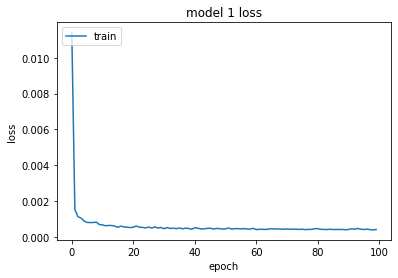

In [13]:
plt.plot(history_1.history['loss'])
#plt.plot(history_1.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
# prep inputs to get predictions

dataset_train = df.iloc[:train_size, 1:]
dataset_test = df.iloc[train_size:, 1:]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

dataset_total.iloc[:, 0:11] = x_sc.fit_transform(dataset_total.iloc[:, 0:11])
dataset_total['Price Ratio'] = y_sc.fit_transform(dataset_total['Price Ratio'].values.reshape(-1,1))

inputs = dataset_total[len(dataset_total) - len(dataset_test) - window:].values
inputs = inputs.reshape(-1,12)

X_test = []
for i in range(window, test_size+window):
    X_test.append(inputs[i-window:i, 0:11])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 11))

# get predictions

predicted_values = model_1.predict(X_test)
predicted_values = y_sc.inverse_transform(predicted_values)

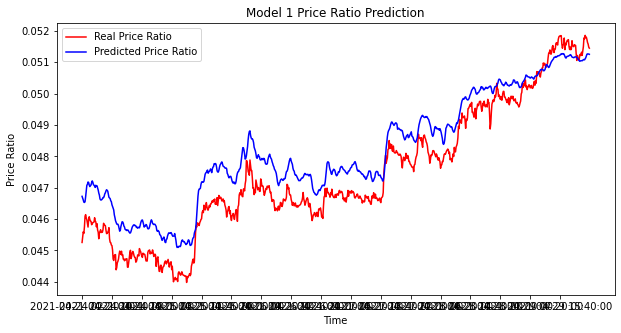

In [15]:
# visualising the results

plt.figure(figsize=(10, 5))
plt.plot(df.iloc[train_size:, 0], dataset_test['Price Ratio'].values, color = 'red', label = 'Real Price Ratio')
plt.plot(df.iloc[train_size:, 0], predicted_values, color = 'blue', label = 'Predicted Price Ratio')
plt.xticks(np.arange(0,test_size,50))
plt.title('Model 1 Price Ratio Prediction')
plt.xlabel('Time')
plt.ylabel('Price Ratio')
plt.legend()

plt.show()

In [16]:
# rmse

rmse = mean_squared_error(dataset_test['Price Ratio'].values, predicted_values, squared=False)
print(rmse)

0.0008465878391492834


In [17]:
# std

test_std = np.std(dataset_test['Price Ratio'].values)
print(test_std)

0.0020794845888984508


## MODEL 2: ONLY SENTIMENT DATA

In [18]:
%reset -f

In [19]:
# imports

import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [20]:
# read data

march_df = pd.read_csv("BTC_10min_ETH_10min_march.csv")
april_df = pd.read_csv("BTC_10min_ETH_10min_april.csv")

In [21]:
# combine data

df = pd.concat([march_df, april_df], axis=0)

df = df[["Timestamp", "BTC Polarity", "ETH Polarity", "BTC Subjectivity", "ETH Subjectivity", "Net Polarity", "Net Subjectivity", "Price Ratio"]]

# split testing and training data

train_size = int(np.round(df.shape[0]*0.90))
test_size = int(np.round(df.shape[0]*0.10))

training_set = df.iloc[:train_size, 1:]
test_set = df.iloc[test_size:, 1:]

In [22]:
training_set.head()

,BTC Polarity,ETH Polarity,BTC Subjectivity,ETH Subjectivity,Net Polarity,Net Subjectivity,Price Ratio
0,0.059776,0.024760,0.247396,0.299496,0.035016,-0.052101,0.031503
1,0.060227,0.060539,0.227976,0.322566,-0.000311,-0.094590,0.031365
2,0.072547,0.106064,0.242424,0.332174,-0.033517,-0.089750,0.031259
3,0.082249,0.036179,0.275825,0.296867,0.046069,-0.021042,0.031183
4,0.101809,0.022930,0.300476,0.317710,0.078879,-0.017233,0.031058


In [23]:
test_set.head()

,BTC Polarity,ETH Polarity,BTC Subjectivity,ETH Subjectivity,Net Polarity,Net Subjectivity,Price Ratio
850,0.102714,0.046874,0.299668,0.365025,0.055841,-0.065356,0.033711
851,0.090503,0.066194,0.284943,0.300029,0.024308,-0.015086,0.033757
852,0.070822,0.045281,0.243996,0.355852,0.025541,-0.111857,0.033856
853,0.067182,0.090686,0.303544,0.370060,-0.023504,-0.066516,0.033854
854,0.101192,0.036569,0.284924,0.353766,0.064622,-0.068842,0.033827


In [24]:
# feature scaling

x_sc = MinMaxScaler(feature_range = (0, 1))
y_sc = MinMaxScaler(feature_range = (0, 1))

training_set.iloc[:, 0:6] = x_sc.fit_transform(training_set.iloc[:, 0:6])
training_set['Price Ratio'] = y_sc.fit_transform(training_set['Price Ratio'].values.reshape(-1,1))
training_set_scaled = training_set.values

In [25]:
# creating a data structure with 6 time-steps and 1 output

window = 6

X_train = []
y_train = []
for i in range(window, train_size):
    X_train.append(training_set_scaled[i-window:i, 0:6])
    y_train.append(training_set_scaled[i, -1])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))

In [26]:
X_train.shape

(7640, 6, 6)

In [27]:
y_train.shape

(7640,)

In [28]:
# model

model_2 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model_2.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50, return_sequences = True))
model_2.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50, return_sequences = True))
model_2.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model_2.add(LSTM(units = 50))
model_2.add(Dropout(0.2))

# Adding the output layer
model_2.add(Dense(units = 1))

# Compiling the RNN
model_2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
# Fitting the RNN to the Training set

history_2 = model_2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
239/239 [==============================] - 10s 13ms/step - loss: 0.0434
Epoch 2/100
239/239 [==============================] - 3s 14ms/step - loss: 0.0408
Epoch 3/100
239/239 [==============================] - 3s 13ms/step - loss: 0.0404
Epoch 4/100
239/239 [==============================] - 3s 13ms/step - loss: 0.0398
Epoch 5/100
239/239 [==============================] - 3s 13ms/step - loss: 0.0388
Epoch 6/100
239/239 [==============================] - 3s 13ms/step - loss: 0.0390
Epoch 7/100
239/239 [==============================] - 3s 14ms/step - loss: 0.0381
Epoch 8/100
239/239 [==============================] - 3s 13ms/step - loss: 0.0379
Epoch 9/100
239/239 [==============================] - 3s 13ms/step - loss: 0.0378
Epoch 10/100
239/239 [==============================] - 3s 13ms/step - loss: 0.0374
Epoch 11/100
239/239 [==============================] - 3s 13ms/step - loss: 0.0370
Epoch 12/100
239/239 [==============================] - 3s 13ms/step - loss: 0.0366


239/239 [==============================] - 3s 13ms/step - loss: 0.0311
Epoch 99/100
239/239 [==============================] - 3s 13ms/step - loss: 0.0314
Epoch 100/100
239/239 [==============================] - 3s 13ms/step - loss: 0.0311


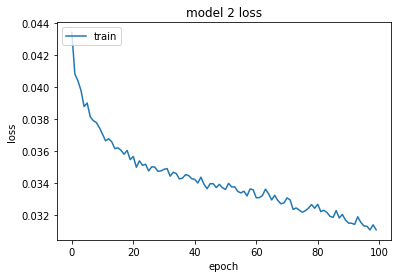

In [30]:
plt.plot(history_2.history['loss'])
#plt.plot(history_2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
# prep inputs to get predictions

dataset_train = df.iloc[:train_size, 1:]
dataset_test = df.iloc[train_size:, 1:]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

dataset_total.iloc[:, 0:6] = x_sc.fit_transform(dataset_total.iloc[:, 0:6])
dataset_total['Price Ratio'] = y_sc.fit_transform(dataset_total['Price Ratio'].values.reshape(-1,1))

inputs = dataset_total[len(dataset_total) - len(dataset_test) - window:].values
inputs = inputs.reshape(-1,7)

X_test = []
for i in range(window, test_size+window):
    X_test.append(inputs[i-window:i, 0:6])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))

# get predictions

predicted_values = model_2.predict(X_test)
predicted_values = y_sc.inverse_transform(predicted_values)

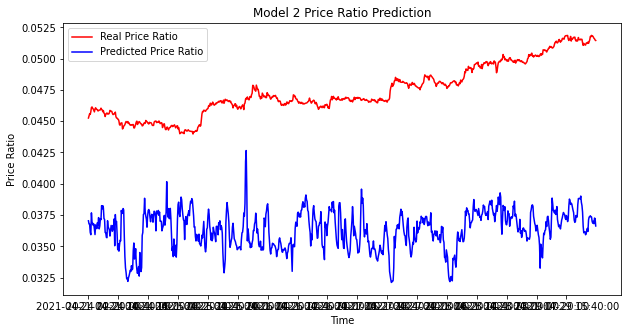

In [32]:
# visualising the results

plt.figure(figsize=(10, 5))
plt.plot(df.iloc[train_size:, 0], dataset_test['Price Ratio'].values, color = 'red', label = 'Real Price Ratio')
plt.plot(df.iloc[train_size:, 0], predicted_values, color = 'blue', label = 'Predicted Price Ratio')
plt.xticks(np.arange(0,test_size,50))
plt.title('Model 2 Price Ratio Prediction')
plt.xlabel('Time')
plt.ylabel('Price Ratio')
plt.legend()

plt.show()

In [33]:
# rmse

rmse = mean_squared_error(dataset_test['Price Ratio'].values, predicted_values, squared=False)
print(rmse)

0.01131679630828617


In [34]:
# std

test_std = np.std(dataset_test['Price Ratio'].values)
print(test_std)

0.0020794845888984508


## MODEL 3: ONLY FINANCIAL DATA

In [35]:
%reset -f

In [36]:
# imports

import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [37]:
# read data

march_df = pd.read_csv("BTC_10min_ETH_10min_march.csv")
april_df = pd.read_csv("BTC_10min_ETH_10min_april.csv")

In [38]:
# combine data

df = pd.concat([march_df, april_df], axis=0)

df = df[["Timestamp", "BTC Price", "ETH Price", "BTC Volume USD", "ETH Volume USD", "Net Volume", "Price Ratio"]]

# split testing and training data

train_size = int(np.round(df.shape[0]*0.90))
test_size = int(np.round(df.shape[0]*0.10))

training_set = df.iloc[:train_size, 1:]
test_set = df.iloc[test_size:, 1:]

In [39]:
training_set.head()

,BTC Price,ETH Price,BTC Volume USD,ETH Volume USD,Net Volume,Price Ratio
0,45346.19,1428.53,11649.92686,40722.93557,-29073.00871,0.031503
1,45289.97,1420.54,313492.75750,0.00000,313492.75750,0.031365
2,46340.26,1448.57,590826.20210,49394.48724,541431.71486,0.031259
3,46473.16,1449.17,315746.03920,68768.92247,246977.11673,0.031183
4,46555.87,1445.92,203311.87260,81577.03215,121734.84045,0.031058


In [40]:
test_set.head()

,BTC Price,ETH Price,BTC Volume USD,ETH Volume USD,Net Volume,Price Ratio
850,48648.93,1640.00,1266.818137,1.829677e+06,-1.828410e+06,0.033711
851,48592.81,1640.33,260150.012000,1.141728e+05,1.459773e+05,0.033757
852,48678.81,1648.08,168693.683200,9.589411e+03,1.591043e+05,0.033856
853,48606.79,1645.54,21562.122240,6.203615e+04,-4.047403e+04,0.033854
854,48652.82,1645.79,784.472231,5.443107e+04,-5.364660e+04,0.033827


In [41]:
# feature scaling

x_sc = MinMaxScaler(feature_range = (0, 1))
y_sc = MinMaxScaler(feature_range = (0, 1))

training_set.iloc[:, 0:5] = x_sc.fit_transform(training_set.iloc[:, 0:5])
training_set['Price Ratio'] = y_sc.fit_transform(training_set['Price Ratio'].values.reshape(-1,1))
training_set_scaled = training_set.values

In [42]:
# creating a data structure with 6 time-steps and 1 output

window = 6

X_train = []
y_train = []
for i in range(window, train_size):
    X_train.append(training_set_scaled[i-window:i, 0:5])
    y_train.append(training_set_scaled[i, -1])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))

In [43]:
X_train.shape

(7640, 6, 5)

In [44]:
y_train.shape

(7640,)

In [45]:
# model

model_3 = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model_3.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True))
model_3.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50, return_sequences = True))
model_3.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model_3.add(LSTM(units = 50))
model_3.add(Dropout(0.2))

# Adding the output layer
model_3.add(Dense(units = 1))

# Compiling the RNN
model_3.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [46]:
# Fitting the RNN to the Training set

history_3 = model_3.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
239/239 [==============================] - 11s 13ms/step - loss: 0.0085
Epoch 2/100
239/239 [==============================] - 3s 13ms/step - loss: 0.0014
Epoch 3/100
239/239 [==============================] - 3s 14ms/step - loss: 0.0010
Epoch 4/100
239/239 [==============================] - 3s 13ms/step - loss: 9.5966e-04
Epoch 5/100
239/239 [==============================] - 3s 13ms/step - loss: 8.6196e-04
Epoch 6/100
239/239 [==============================] - 3s 13ms/step - loss: 7.9098e-04
Epoch 7/100
239/239 [==============================] - 3s 13ms/step - loss: 8.6221e-04
Epoch 8/100
239/239 [==============================] - 3s 14ms/step - loss: 6.8814e-04
Epoch 9/100
239/239 [==============================] - 3s 13ms/step - loss: 6.7080e-04
Epoch 10/100
239/239 [==============================] - 3s 13ms/step - loss: 6.7517e-04
Epoch 11/100
239/239 [==============================] - 3s 13ms/step - loss: 5.8268e-04
Epoch 12/100
239/239 [==============================

239/239 [==============================] - 3s 13ms/step - loss: 3.7713e-04
Epoch 95/100
239/239 [==============================] - 3s 13ms/step - loss: 4.2692e-04
Epoch 96/100
239/239 [==============================] - 3s 13ms/step - loss: 4.3358e-04
Epoch 97/100
239/239 [==============================] - 3s 14ms/step - loss: 3.9169e-04
Epoch 98/100
239/239 [==============================] - 3s 14ms/step - loss: 4.2160e-04
Epoch 99/100
239/239 [==============================] - 3s 13ms/step - loss: 3.6908e-04
Epoch 100/100
239/239 [==============================] - 3s 14ms/step - loss: 4.0696e-04


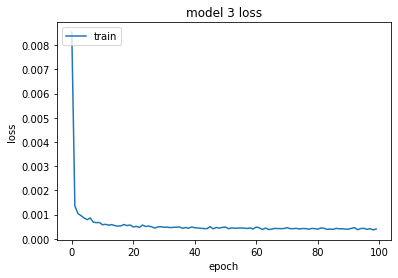

In [47]:
plt.plot(history_3.history['loss'])
#plt.plot(history_3.history['val_loss'])
plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [48]:
# prep inputs to get predictions

dataset_train = df.iloc[:train_size, 1:]
dataset_test = df.iloc[train_size:, 1:]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

dataset_total.iloc[:, 0:5] = x_sc.fit_transform(dataset_total.iloc[:, 0:5])
dataset_total['Price Ratio'] = y_sc.fit_transform(dataset_total['Price Ratio'].values.reshape(-1,1))

inputs = dataset_total[len(dataset_total) - len(dataset_test) - window:].values
inputs = inputs.reshape(-1,6)

X_test = []
for i in range(window, test_size+window):
    X_test.append(inputs[i-window:i, 0:5])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))

# get predictions

predicted_values = model_3.predict(X_test)
predicted_values = y_sc.inverse_transform(predicted_values)

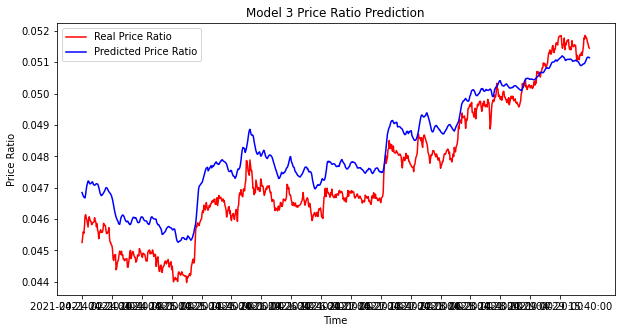

In [49]:
# visualising the results

plt.figure(figsize=(10, 5))
plt.plot(df.iloc[train_size:, 0], dataset_test['Price Ratio'].values, color = 'red', label = 'Real Price Ratio')
plt.plot(df.iloc[train_size:, 0], predicted_values, color = 'blue', label = 'Predicted Price Ratio')
plt.xticks(np.arange(0,test_size,50))
plt.title('Model 3 Price Ratio Prediction')
plt.xlabel('Time')
plt.ylabel('Price Ratio')
plt.legend()

plt.show()

In [50]:
# rmse

rmse = mean_squared_error(dataset_test['Price Ratio'].values, predicted_values, squared=False)
print(rmse)

0.0009506096703975036


In [51]:
# std

test_std = np.std(dataset_test['Price Ratio'].values)
print(test_std)

0.0020794845888984508
